In [23]:
import pandas as pd
df = pd.read_csv('events.csv')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
df['date'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head()

,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,dayofweek,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02 07:02:12.117,2015,6,2,1,7
1,1433224214164,992329,view,248676,NaN,2015-06-02 07:50:14.164,2015,6,2,1,7
2,1433221999827,111016,view,318965,NaN,2015-06-02 07:13:19.827,2015,6,2,1,7
3,1433221955914,483717,view,253185,NaN,2015-06-02 07:12:35.914,2015,6,2,1,7
4,1433221337106,951259,view,367447,NaN,2015-06-02 07:02:17.106,2015,6,2,1,7


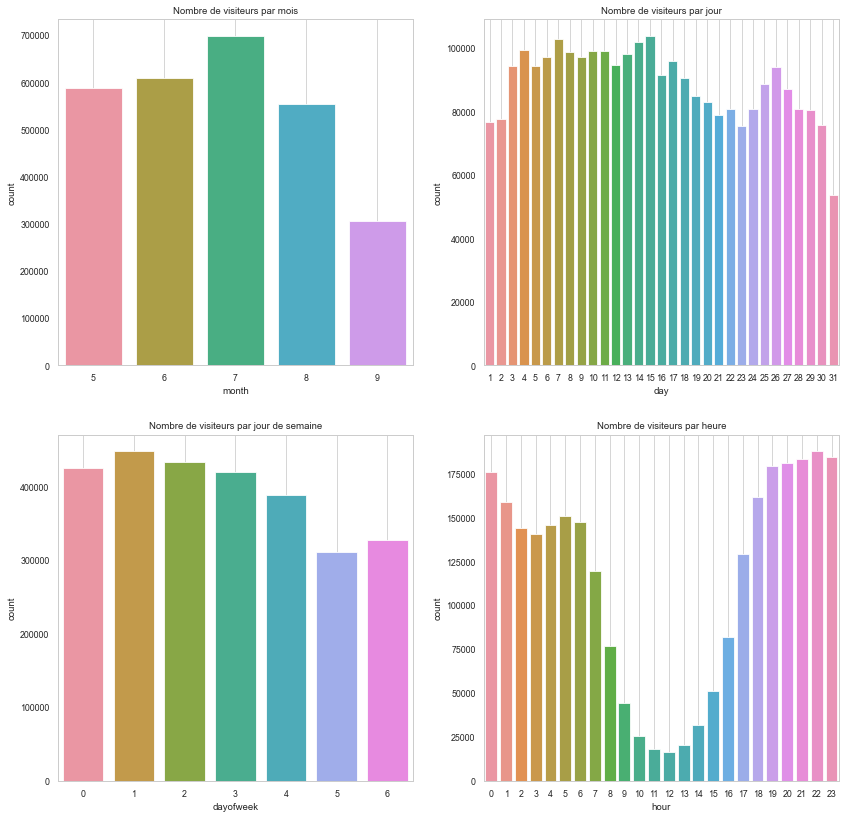

In [24]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette(['#39A7D0','#36ADA4'])

# Visiteurs par date
plt.figure(figsize = (14,14))

# Visiteurs par mois
plt.subplot(221)
sns.countplot(x='month', data=df)
plt.title('Nombre de visiteurs par mois')
plt.grid()

# Visiteurs par jour
plt.subplot(222)
sns.countplot(x='day', data=df)
plt.title('Nombre de visiteurs par jour')
plt.grid()

# Visiteurs par jour de semaine
plt.subplot(223)
sns.countplot(x='dayofweek', data=df)
plt.title('Nombre de visiteurs par jour de semaine')
plt.grid()

# Visiteurs par heure
plt.subplot(224)
sns.countplot(x='hour', data=df)
plt.title('Nombre de visiteurs par heure')
plt.grid()

In [10]:
# Diviser entre transactions et le reste
non_transactions = df.loc[df.event != "transaction"]
transactions = df.loc[df.event == "transaction"]

# Merger les deux tableaux afin de calculer le temps passé entre 2 actions successives
inner_merged_total = pd.merge(transactions, non_transactions, on=["visitorid"], how="inner")

# Calculez la différence entre l'heure à laquelle la transaction s'est produite
# et l'heure à laquelle chaque événement s'est produit
inner_merged_total['time_diff'] = inner_merged_total['date_x'] - inner_merged_total['date_y']

# Trier le dataframe par visitorid...
inner_merged_total = inner_merged_total.sort_values(by=['visitorid','date_x','date_y','itemid_x'])

# Appliquer 2 conditions importantes pour définir une visite convertissante : 
# Premièrement, time_diff est moins de 24h. Deuxièmement, le itemid sur lequel la transaction 
# a eu lieu et le itemid sur lequel chaque événement s'est produit doivent être les mêmes
transaction_24h = inner_merged_total.loc[inner_merged_total['time_diff'].dt.days < 1]
transaction_made_24h = transaction_24h.loc[inner_merged_total['itemid_x'] == inner_merged_total['itemid_y']]

# Supprimer certaines colonnes
transaction_made_24h = transaction_made_24h.drop(['timestamp_x','timestamp_y','transactionid_y'], axis=1)

# Convertir 'time_diff' en timedelta en seconds
transaction_made_24h['time_diff_sec'] = transaction_made_24h['time_diff'].dt.seconds
transaction_made_24h = transaction_made_24h.drop(['year_x','month_x','day_x','dayofweek_x','hour_x'], axis=1)
transaction_made_24h = transaction_made_24h.drop(['year_y','month_y','day_y','dayofweek_y','hour_y'], axis=1)
transaction_made_24h

,visitorid,event_x,itemid_x,transactionid_x,date_x,event_y,itemid_y,date_y,time_diff,time_diff_sec
10069099,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,view,465522,2015-08-15 03:06:38.438,0 days 00:22:22.792000,1342
10069108,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,addtocart,465522,2015-08-15 03:13:39.691,0 days 00:15:21.539000,921
10069105,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,addtocart,465522,2015-08-15 03:13:48.324,0 days 00:15:12.906000,912
10069098,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,view,465522,2015-08-15 03:27:09.037,0 days 00:01:52.193000,112
10069106,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,view,465522,2015-08-15 03:27:27.421,0 days 00:01:33.809000,93
...,...,...,...,...,...,...,...,...,...,...
9743949,1407110,transaction,360922,3851.0,2015-08-05 01:11:25.624,view,360922,2015-08-05 00:57:13.885,0 days 00:14:11.739000,851
9743946,1407110,transaction,360922,3851.0,2015-08-05 01:11:25.624,view,360922,2015-08-05 01:00:26.861,0 days 00:10:58.763000,658
9743942,1407110,transaction,360922,3851.0,2015-08-05 01:11:25.624,view,360922,2015-08-05 01:03:14.670,0 days 00:08:10.954000,490
9743943,1407110,transaction,360922,3851.0,2015-08-05 01:11:25.624,addtocart,360922,2015-08-05 01:05:35.724,0 days 00:05:49.900000,349


In [21]:
# Grouper par visitorid
group_visitor = transaction_made_24h.groupby('visitorid')

# Calculer le temps moyen par visitorid - heure, minute, second
time_mean_visitor = transaction_made_24h.groupby(by=['visitorid']).mean()
time_mean_visitor = time_mean_visitor.drop(['transactionid_x','itemid_x','itemid_y'], axis=1)
time_mean_visitor = time_mean_visitor.rename(columns={"time_diff_sec": "mean_time_second"})
time_mean_visitor['mean_time_minute'] = round(time_mean_visitor['mean_time_second']/60)
time_mean_visitor['mean_time_hour'] = round(time_mean_visitor['mean_time_second']/3600,2)
time_mean_visitor

,mean_time_second,mean_time_minute,mean_time_hour
visitorid,,,
172,1156.000000,19.0,0.32
186,49272.000000,821.0,13.69
264,526.200000,9.0,0.15
419,6432.000000,107.0,1.79
539,36920.666667,615.0,10.26
...,...,...,...
1406787,17367.800000,289.0,4.82
1406981,243.500000,4.0,0.07
1407070,608.000000,10.0,0.17


In [16]:
# Grouper par transactionid
group_transaction = transaction_made_24h.groupby('transactionid_x')

# Calculer le temps moyen par transactionid
time_mean_transaction = transaction_made_24h.groupby(by=['transactionid_x']).mean()
time_mean_transaction = time_mean_transaction.drop(['visitorid','itemid_x','itemid_y'], axis=1)
time_mean_transaction = time_mean_transaction.rename(columns={"time_diff_sec": "mean_time_second"})
time_mean_transaction['mean_time_minute'] = round(time_mean_transaction['mean_time_second']/60)
time_mean_transaction['mean_time_hour'] = round(time_mean_transaction['mean_time_second']/3600,2)
time_mean_transaction

,mean_time_second,mean_time_minute,mean_time_hour
transactionid_x,,,
0.0,7838.333333,131.0,2.18
1.0,39733.750000,662.0,11.04
2.0,189.000000,3.0,0.05
4.0,21935.625000,366.0,6.09
6.0,108.000000,2.0,0.03
...,...,...,...
17667.0,10988.800000,183.0,3.05
17668.0,146.000000,2.0,0.04
17669.0,53412.666667,890.0,14.84


In [22]:
# Nombre de visites
stats = df.groupby('visitorid').agg({'visitorid':'count'})
stats = stats.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par visitorid
view = df.loc[df['event'] == 'view'].groupby('visitorid').agg({'visitorid':'count'})
view = view.rename(columns={"visitorid": "nb_views"})

# Nombre de addtocarts par visitorid
addtocart = df.loc[df['event'] == 'addtocart'].groupby('visitorid').agg({'visitorid':'count'})
addtocart = addtocart.rename(columns={"visitorid": "nb_addtocarts"})

# Nombre de transactions par visitorid
transaction = df.loc[df['event'] == 'transaction'].groupby('visitorid').agg({'visitorid':'count'})
transaction = transaction.rename(columns={"visitorid": "nb_transactions"})

# Merge les dataframes
stats = pd.merge(stats, view, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, addtocart, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, transaction, left_index=True, right_index=True, how='left')

# Merge avec temps moyen passé
stats = pd.merge(stats, time_mean_visitor, left_index=True, right_index=True, how='left')
stats = stats.fillna(0)
stats = stats.sort_values('nb_transactions', ascending=False)
stats


,nb_visites,nb_views,nb_addtocarts,nb_transactions,mean_time_second,mean_time_minute,mean_time_hour
visitorid,,,,,,,
1150086,7757,6479.0,719.0,559.0,17327.795693,289.0,4.81
152963,3024,2304.0,371.0,349.0,18428.511090,307.0,5.12
530559,4328,3623.0,419.0,286.0,18363.266423,306.0,5.10
684514,2246,1826.0,231.0,189.0,15202.321101,253.0,4.22
861299,1991,1573.0,230.0,188.0,12844.838057,214.0,3.57
...,...,...,...,...,...,...,...
471122,1,1.0,0.0,0.0,0.000000,0.0,0.00
471121,1,1.0,0.0,0.0,0.000000,0.0,0.00
471120,2,2.0,0.0,0.0,0.000000,0.0,0.00


In [4]:
#tmp = df.loc[df.columns == 'date','visitorid'].groupby('visitorid')
#print(df.groupby(by="visitorid"))

#data['visitorid'].value_counts()
#grouped = data.groupby("visitorid")
#grouped

# 1150086
bydate = df.sort_values(by=['visitorid', 'date'], ascending=True)
transactions = bydate.loc[bydate['event'] == 'transaction']
print(transactions)
        


             timestamp  visitorid        event  itemid  transactionid  \
848114   1439602141230        172  transaction  465522         9725.0   
850895   1439602141686        172  transaction   10034         9725.0   
814996   1439397297040        186  transaction   49029         8726.0   
1276395  1441647285614        264  transaction  459835         8445.0   
1283314  1441647285708        264  transaction  161949         8445.0   
...                ...        ...          ...     ...            ...   
1690     1433177808042    1406787  transaction  336832        15915.0   
1773812  1431988101266    1406981  transaction  436004          686.0   
1674939  1431556875160    1407070  transaction  215596         5064.0   
677835   1438729885624    1407110  transaction  360922         3851.0   
2165301  1436240835969    1407398  transaction  218917        10009.0   

                           date  year  month  day  dayofweek  hour  
848114  2015-08-15 03:29:01.230  2015      8   15     

In [58]:
import statsmodels.api

print("On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur à un impact sur les transactions.") 

print("Relation entre la variable continue transactionid et la variable catégorielle event.")
print("Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).")

result = statsmodels.formula.api.ols('transactionid ~ event', data = df).fit()
table_eventXtransactionid = statsmodels.api.stats.anova_lm(result)

print("df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid ")

print("On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.")
print("On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),") 
print("si il y a des relations entre ces nouvelles variables quantitatives")

table_eventXtransactionid

On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur à un impact sur les transactions.
Relation entre la variable continue transactionid et la variable catégorielle event.
Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).
df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid 
On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.
On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),
si il y a des relations entre ces nouvelles variables quantitatives


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,3.484181e+07,1.742090e+07,0.669981,0.511729
Residual,22455.0,5.838769e+11,2.600209e+07,NaN,NaN


In [43]:
result = statsmodels.formula.api.ols('itemid ~ event', data = df).fit()
table_eventXitemid = statsmodels.api.stats.anova_lm(result)

print("df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.")

table_eventXitemid

df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,4.217666e+11,2.108833e+11,11.710356,0.000008
Residual,2756098.0,4.963256e+16,1.800827e+10,NaN,NaN


<AxesSubplot:>

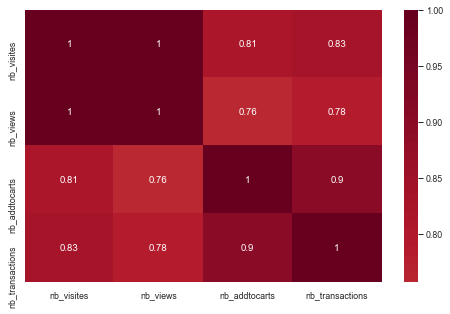

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(stats.corr(), annot=True, cmap='RdBu_r', center=0)



Relation entre les variables nombre de addtocarts et nombre de transactions


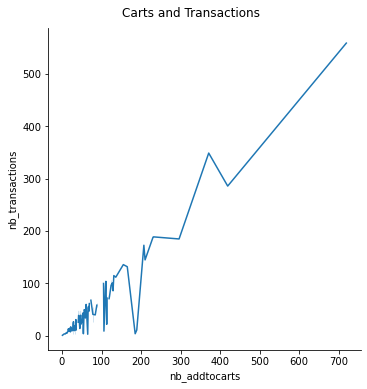

In [4]:
print("Relation entre les variables nombre de addtocarts et nombre de transactions")
g = sns.relplot(x="nb_addtocarts", 
                y="nb_transactions",
                data=stats,
                kind="line",
                markers=True,
                dashes=False)
g.fig.suptitle("Carts and Transactions",y=1.03)
plt.show()



In [4]:
# DATAVIZ 3 - Stats
# Calculate Pearson's correlation
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(stats['nb_addtocarts'], stats['nb_transactions']), index=['pearson_coeff', 'p-value'], columns=['Relation entre nb_addtocarts et nb_transactions'])

,Relation entre nb_addtocarts et nb_transactions
pearson_coeff,0.903854
p-value,0.000000


In [7]:
pd.DataFrame(pearsonr(stats['nb_views'], stats['nb_transactions']), index=['pearson_coef','p-value'], columns = ['Relation entre nb_views et nb_transactions'])


,Relation entre nb_views et nb_transactions
pearson_coef,0.782903
p-value,0.000000


In [6]:
# Nombre de views par visitorid, par item 
visit_view = df.loc[df['event'] == 'view'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_view = visit_view.rename(columns={"event": "nb_view"})
visit_view.sort_values('nb_view', ascending=False)

# Nombre de paniers par visitorid, par item 
visit_add = df.loc[df['event'] == 'addtocart'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_add = visit_add.rename(columns={"event": "nb_addtocart"})
visit_add.sort_values('nb_addtocart', ascending=False)

# Nombre de transacs par visitorid, par item 
visit_transac = df.loc[df['event'] == 'transaction'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_transac = visit_transac.rename(columns={"event": "nb_transac"})
visit_transac.sort_values('nb_transac', ascending=False)

visit_item=pd.merge(visit_view, visit_add, how='outer')
visit_item=pd.merge(visit_item, visit_transac, how='outer')
visit_item.sort_values(['nb_transac','nb_addtocart', 'nb_view','visitorid', 'itemid'], ascending=[False, False, False, False, False])
visit_item.sort_values(by='nb_transac', ascending=False)

,visitorid,itemid,nb_view,nb_addtocart,nb_transac
231334,152963,119736,18.0,NaN,14.0
806384,530559,119736,19.0,9.0,9.0
1003673,660393,224549,9.0,6.0,5.0
1782155,1172087,312728,6.0,NaN,5.0
2070162,1365706,227311,4.0,5.0,5.0
...,...,...,...,...,...
2144647,1407512,54141,NaN,1.0,NaN
2144648,1407512,107832,NaN,1.0,NaN
2144649,1407512,241408,NaN,1.0,NaN
2144650,1407512,290723,NaN,1.0,NaN


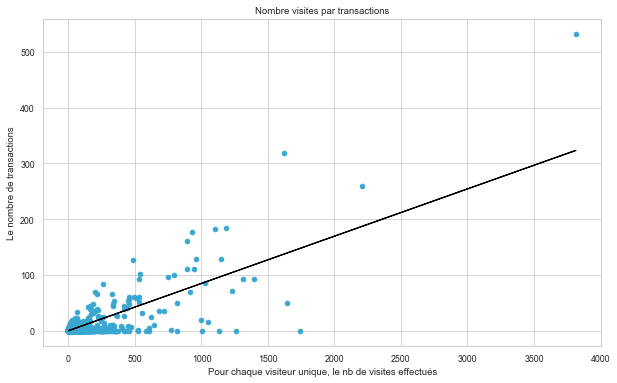

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_validate

nb_transactions=visitor_transaction['nb_transac']
view_by_visitor=visitor_transaction[['nb_de_visit']]

slr=LinearRegression()
slr.fit(view_by_visitor, nb_transactions)
cross_validate(slr, view_by_visitor, nb_transactions, return_train_score=True, cv=4)['test_score'].mean()

pred_transac = slr.predict(view_by_visitor)
residus = pred_transac - nb_transactions

# On va faire un groupement des visitors qui achètent le plus 
visitor_transaction=visit_item.groupby(by='visitorid').agg({'nb_transac':'count', 'visitorid':'count'}).rename(columns={'visitorid':'nb_de_visit'})

plt.figure(figsize=(10,6))
plt.scatter(x='nb_de_visit', y='nb_transac', data=visitor_transaction)
plt.xlabel('Pour chaque visiteur unique, le nb de visites effectués')
plt.ylabel('Le nombre de transactions')
plt.title('Nombre visites par transactions');
plt.plot(view_by_visitor, pred_transac, color="black");




In [55]:
print("la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.")
print("Lorsque le nombre de view augmentent les transactions augmentent aussi.")

pd.DataFrame(pearsonr(visitor_transaction['nb_de_visit'],visitor_transaction['nb_transac']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])



la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.
Lorsque le nombre de view augmentent les transactions augmentent aussi.


,resultat_test
pearson_coeff,0.777609
p-value,0.000000


In [7]:
# Nombre de visites par itemsid
items = df.groupby('itemid').agg({'visitorid':'count'})
items = items.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par itemid
items_view = df.loc[df['event'] == 'view'].groupby('itemid').agg({'itemid':'count'}) #df.loc[df['itemid'] == 9]
items_view = items_view.rename(columns={"itemid": "nb_views"})

# Nombre de addtocarts par itemid
items_addtocart = df.loc[df['event'] == 'addtocart'].groupby('itemid').agg({'itemid':'count'})
items_addtocart = items_addtocart.rename(columns={"itemid": "nb_addtocarts"})

# Nombre de transactions par itemid
items_transaction = df.loc[df['event'] == 'transaction'].groupby('itemid').agg({'itemid':'count'})
items_transaction = items_transaction.rename(columns={"itemid": "nb_transactions"})

# Merge dataframes
items = pd.merge(items, items_view, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_addtocart, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_transaction, left_index=True, right_index=True, how='left')
items

# Remplaçons les Nans par 0 
items = items.fillna(0)
# Vérifions que les Nans ont bien été remplacé
items.isnull().sum(axis = 0)



nb_visites         0
nb_views           0
nb_addtocarts      0
nb_transactions    0
dtype: int64

In [8]:
n_produits = 20

# les 20 produits plus achetés
top_produits_vendus = items.sort_values(by='nb_transactions', ascending=False).head(n_produits)
top_produits_vendus['cat_produits_plus_vendus'] = "1"
top_produits_vendus = top_produits_vendus.drop(columns=['nb_visites', 'nb_views', 'nb_addtocarts'])

# les 20 produits plus mis au panier
top_produits_paniers = items.sort_values(by='nb_addtocarts', ascending=False).head(n_produits)
top_produits_paniers['cat_produits_plus_mis_panier'] = "1"
top_produits_paniers = top_produits_paniers.drop(columns=['nb_visites', 'nb_views', 'nb_transactions'])

# les 20 produits plus vus
top_produits_vus = items.sort_values(by='nb_views', ascending=False).head(n_produits)
top_produits_vus['cat_produits_plus_vus'] = "1"
top_produits_vus = top_produits_vus.drop(columns=['nb_visites', 'nb_addtocarts', 'nb_transactions'])

# Merge les 3 dataframes OUTER
top_produits = pd.merge(top_produits_vendus, top_produits_paniers, left_index=True, right_index=True, how='outer')
top_produits = pd.merge(top_produits, top_produits_vus, left_index=True, right_index=True, how='outer')

top_produits = top_produits[['nb_views', 'nb_addtocarts', 'nb_transactions', 'cat_produits_plus_vus', 'cat_produits_plus_mis_panier', 'cat_produits_plus_vendus']]
top_produits.head()

,nb_views,nb_addtocarts,nb_transactions,cat_produits_plus_vus,cat_produits_plus_mis_panier,cat_produits_plus_vendus
itemid,,,,,,
5411,2325.0,NaN,NaN,1,NaN,NaN
7943,1346.0,97.0,46.0,1,1,1
9877,NaN,70.0,25.0,NaN,1,1
17478,NaN,72.0,37.0,NaN,1,1
29196,NaN,136.0,NaN,NaN,1,NaN


/Users/sooyounglee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


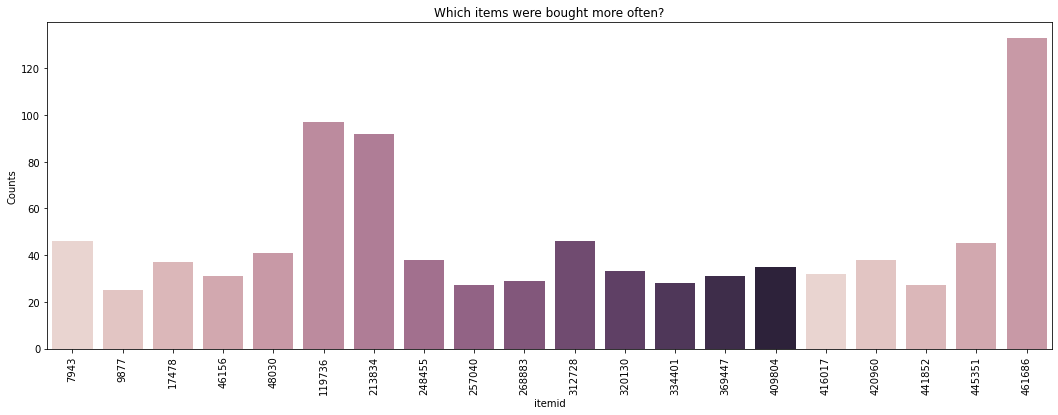

In [10]:
plt.figure(figsize=(18,6))
sns.barplot(top_produits_vendus.index, top_produits_vendus.nb_transactions, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août
l'item 119736 est plus populaire au mois de juin et août
l'item 213834 est plus populaire au mois de juillet
l'item 312728 est plus populaire durant l'été


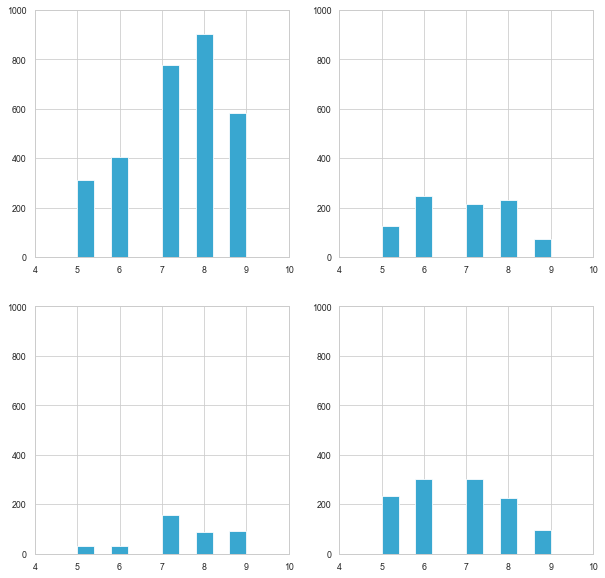

In [28]:
# Etudier l'évolution des 4 items les plus achetés par rapport au mois  
l = {461686,119736}
max_item_1 = df.loc[df['itemid']==461686] 
max_item_2 = df.loc[df['itemid']==119736]
max_item_3 = df.loc[df['itemid']==213834]
max_item_4 = df.loc[df['itemid']==312728]

fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.axis([4,10,0,1000])
plt.hist(max_item_1.month);

plt.subplot(222)
plt.axis([4,10,0,1000])
plt.hist(max_item_2.month);

plt.subplot(223)
plt.axis([4,10,0,1000])
plt.hist(max_item_3.month);

plt.subplot(224)
plt.axis([4,10,0,1000])
plt.hist(max_item_4.month);

print("Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août")
print("l'item 119736 est plus populaire au mois de juin et août")
print("l'item 213834 est plus populaire au mois de juillet")
print("l'item 312728 est plus populaire durant l'été")

In [38]:
items = items.fillna(0)
print("p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes")
print("coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.")
pd.DataFrame(pearsonr(items['nb_views'], items['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test_items'])



p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes
coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.


,resultat_test_items
pearson_coef,0.540263
p-value,0.000000


In [9]:
# Si un produit est dans les 3 catégories plus vus, plus mis, plus vendus, 
# le produit sera classé 3 étoiles dans cat_produits_recommandations
top_produits = top_produits.fillna(0)
top_produits['stars_produits_recommandations'] = top_produits['cat_produits_plus_vus'].astype(int) + top_produits['cat_produits_plus_mis_panier'].astype(int) + top_produits['cat_produits_plus_vendus'].astype(int)

stars_produits = top_produits.sort_values(by='stars_produits_recommandations', ascending=False)
produits_plus_vendus = top_produits.sort_values(by='nb_transactions', ascending=False)



/Users/sooyounglee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


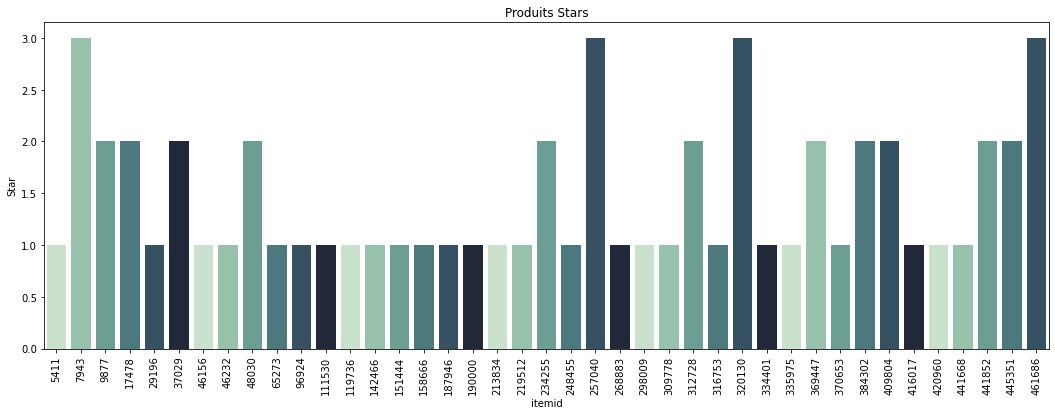

In [10]:
# Moteur de recommandation : Calculs Nombres de transaction, de view, d'add to cart
plt.figure(figsize=(18,6))
sns.barplot(stars_produits.index, stars_produits.stars_produits_recommandations, palette=sns.cubehelix_palette(rot=-.4))
plt.ylabel("Star")
plt.title("Produits Stars");
plt.xticks(rotation=90);

